[-0.16572199  0.38930399 -0.1338417 ]


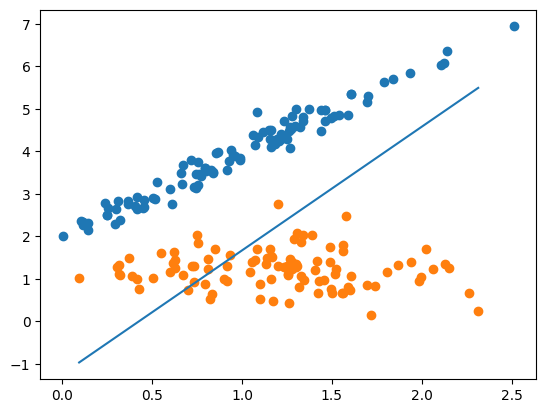

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(123)

# set number of points per class
N = 100

# generate the points for class 1
# x1 is the first feature, a normal distribution centered at 0.5
X1_1 = np.random.normal(loc=1, scale=0.5, size=N)
X2_1 = 2 * X1_1 + np.random.normal(loc=0, scale=0.2, size=N) + 2
Y_1 = np.ones(N)

# we do the same thing for the 2nd cathegory
X1_2 = np.random.normal(loc = 1.2, scale=0.5, size=N)
X2_2 = np.random.normal(loc = 1.2, scale=0.5, size=N)
Y_2 = -np.ones(N)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

w = np.random.uniform(low=-1, size=3)
print(w)

# -w[1]/w[2]
# -w[0]/w[2]

plt.plot([np.min(X1_2), np.max(X1_2)], [np.min(X1_2) * (-w[1]/w[2]) + (-w[0]/w[2]), np.max(X1_2) * (-w[1]/w[2]) + (-w[0]/w[2])])

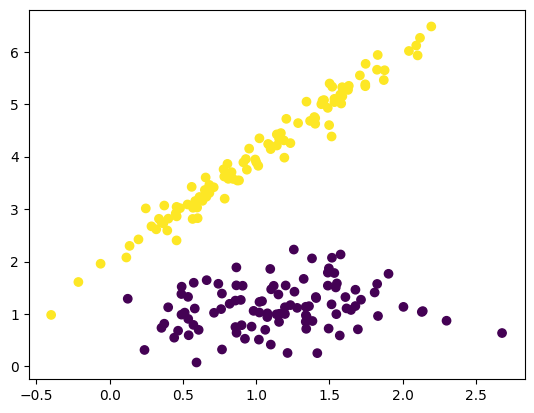

In [3]:
# merging the dataset into one matrix

X0 = np.ones(N * 2)

# create the vector of values for feature 1
X1 = np.concatenate((X1_1, X1_2))
X1.shape

# create the vector of values for feature 2
X2 = np.concatenate((X2_1, X2_2))
X2.shape

# creating the matrix X, with the feature 0 X0 (vector of 1s), X1 and X2
X = np.stack((X0, X1, X2), axis=1) # axis = 1 makes it stack along columns
X.shape

Y = np.concatenate((Y_1, Y_2))

# double check that the 2nd column and the 3rd column of the matrix are the same as before
plt.scatter(X[:, 1], X[:, 2], c=Y)

9


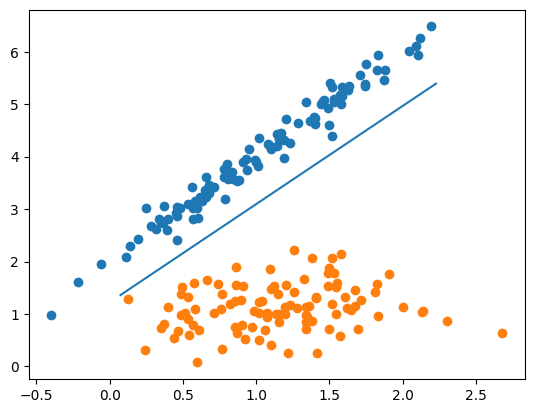

In [4]:
# generate a random hyperplane
w = np.random.uniform(low=-1, size=3)

# set error
num_errors = 0

# number of epochs
num_epochs = 0

while True:
    num_epochs += 1
    
    for i in range(Y.shape[0]):
        x = X[i, :]
        y = Y[i]
        #print(x, y)
        
        # if the output is not aligned with y
        if (np.dot(w, x) * y < 0):
            num_errors += 1
            # update the vector with the rule
            w = w + x * y
    
    if (num_errors == 0):
        break
    else:
        num_errors = 0

print(num_epochs)
        
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
plt.plot([np.min(X2_2), np.max(X2_2)], [np.min(X2_2) * (-w[1]/w[2]) + (-w[0]/w[2]), np.max(X2_2) * (-w[1]/w[2]) + (-w[0]/w[2])])

In [5]:
w

array([-5.16105507, -7.90777657,  4.2238476 ])